<a href="https://colab.research.google.com/github/SachiSachu/CS401/blob/main/Bayes_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linearly separable with bayes classifier with 3 data sets

In [ ]:
#linearly separable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')

Text(0, 0.5, 'X2')

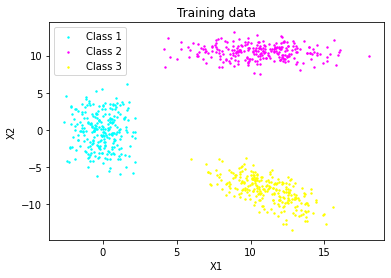

In [ ]:
# simply visualising data
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)
plt.legend((C1plt, C2plt, C3plt), ('Class 1', 'Class 2', 'Class 3'))
plt.title('Training data')
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
# find parameters
u_1 = np.mean(X_1, axis = 0)
u_2 = np.mean(X_2, axis = 0)
u_3 = np.mean(X_3, axis = 0)
s_1 = np.mean(np.cov(X_1.T))
s_2 = np.mean(np.cov(X_2.T))
s_3 = np.mean(np.cov(X_3.T))
s = np.mean([s_1, s_2, s_3])
pc_1 = X_1.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0])
pc_2 = X_2.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0])
pc_3 = X_3.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0])

In [ ]:
# define functions g1, g2, g3
def g1(x):
    w1 = u_1/s
    w0 = -np.dot(u_1.T, u_1)/(2*s) + np.log(pc_1)
    return np.dot(w1.T, x)+w0
def g2(x):
    w1 = u_2/s
    w0 = -np.dot(u_2.T, u_2)/(2*s) + np.log(pc_2)
    return np.dot(w1.T, x)+w0
def g3(x):
    w1 = u_3/s
    w0 = -np.dot(u_3.T, u_3)/(2*s) + np.log(pc_3)
    return np.dot(w1.T, x)+w0

In [ ]:
# classifier
def predict(x):
    return np.argmax([g1(x), g2(x), g3(x)])

In [ ]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((3, 3))   #__________________________>>>>>>>>(4,4)
X = [X_1_test, X_2_test, X_3_test]
for i in range(3):
    for x in X[i]:
        ConfusionMatrix[predict(x), i] = ConfusionMatrix[predict(x), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3'],['True 1', 'True 2', 'True 3'])

,True 1,True 2,True 3
Predicted 1,100.0,0.0,0.0
Predicted 2,0.0,100.0,0.0
Predicted 3,0.0,0.0,100.0


In [ ]:
# performance measures
N = np.sum(ConfusionMatrix, axis = 0)
TP = np.diagonal(ConfusionMatrix)
TN = np.sum(TP)-TP
FP = np.sum(ConfusionMatrix, axis = 1)-TP
FN = np.sum(ConfusionMatrix, axis = 0)-TP
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy.tolist(),
    'Mean Accuracy': np.mean(Accuracy)
})
print({
    'Precision: ': Precision.tolist(),
    'Mean Precision': np.mean(Precision)
})
print({
    'Recall: ': Recall.tolist(),
    'Mean Recall': np.mean(Recall)
})
print({
    'F_measure: ': F_measure.tolist(),
    'Mean F_measure': np.mean(F_measure)
})

{'Accuracy: ': [100.0, 100.0, 100.0], 'Mean Accuracy': 100.0}
{'Precision: ': [1.0, 1.0, 1.0], 'Mean Precision': 1.0}
{'Recall: ': [1.0, 1.0, 1.0], 'Mean Recall': 1.0}
{'F_measure: ': [1.0, 1.0, 1.0], 'Mean F_measure': 1.0}


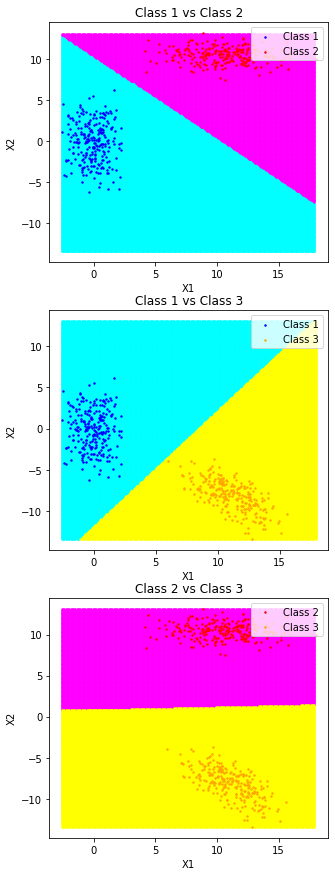

In [ ]:
# decision region plot for every pair of classes with the respective training data superimposed
Nclasses = 3             #----------------->>>>>>>>>>>>4
Nfigures = (Nclasses)*(Nclasses-1)//2
plt.rcParams['figure.figsize'] = [5, 5*Nfigures]
fig, axs = plt.subplots(Nfigures, 1)

x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1])])

g = [g1, g2, g3]
bg = ['cyan', 'magenta', 'yellow']
fc = ['blue', 'red', 'orange']
X = [X_1, X_2, X_3]

i = 0
for c1 in range(1, Nclasses+1):
    for c2 in range(c1+1, Nclasses+1):
        x_1 = []
        x_2 = []
        for x in np.arange(x_min, x_max, 0.1):
            for y in np.arange(y_min, y_max, 0.1):
                c = np.argmax([g[c1-1]([x, y]), g[c2-1]([x, y])])
                if c == 0:
                    x_1.append([x, y])
                elif c == 1:
                    x_2.append([x, y])
        x_1 = np.array(x_1)
        x_2 = np.array(x_2)
        axs[i].scatter(x_1[:, 0], x_1[:, 1], color = bg[c1-1], s = 2)
        axs[i].scatter(x_2[:, 0], x_2[:, 1], color = bg[c2-1], s = 2)
        C1plt = axs[i].scatter(X[c1-1][:, 0], X[c1-1][:, 1], color = fc[c1-1], s = 2)
        C2plt = axs[i].scatter(X[c2-1][:, 0], X[c2-1][:, 1], color = fc[c2-1], s = 2)
        axs[i].set_title('Class '+str(c1)+' vs Class '+str(c2))
        axs[i].set_xlabel('X1')
        axs[i].set_ylabel('X2')
        axs[i].legend((C1plt, C2plt), ('Class '+str(c1), 'Class '+str(c2)))
        i = i+1

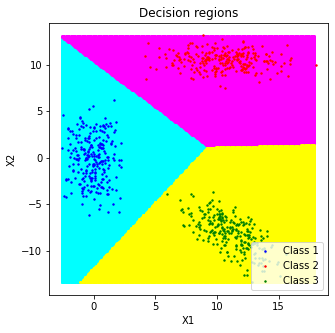

In [ ]:
# Decision region plot for all the classes together with the training data superposed
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
x_3 = []
#x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = predict([x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
        else:
            x_3.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
#x_4 = np.array(x_4)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 4)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 4)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 4)
#plt.scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 4)
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)
#c4plt = plt.scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)
plt.title('Decision regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((C1plt, C2plt, C3plt), ('Class 1', 'Class 2', 'Class 3'))